In [1]:
import xarray as xr 
import pandas as pd
import numpy  as np
import glob
from netCDF4 import Dataset
from wrf import (getvar, ALL_TIMES)
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
# #-- Extract the UWKA flight data
#-#
UWKA_IOP19_path         = "/glade/work/zhixing/Analysis_DATA/SNOWIE_observation/Aircraft/UWKA/20170304.c1.nc"  ## the original UWKA flight data
UWKA_IOP19_nevcorr_path = "/glade/work/zhixing/Analysis_DATA/SNOWIE_observation/Aircraft/UWKA/20170304.c1.nevcorr.nc" ## the corrected Nevzorov probe data
ds = xr.open_dataset(UWKA_IOP19_path)
ds_corr = xr.open_dataset(UWKA_IOP19_nevcorr_path)
flight_time = ds.time  ## the time
flight_ht   = ds.galt  ## the altitude of UWKA flight tracks
flight_lat  = ds.GLAT  ## latitude
flight_lon  = ds.GLON  ## longitude
cdplwc_corr = ds_corr.cdplwc  ## CDP liquid water content
nevlwc_corr  = ds_corr.nevlwc ## nevzrov liquid water content
cdpconc_NRB = ds.cdpconc_NRB ## DMT CDP Total Concentration -- rebinned units: cm-3

In [3]:
timedelta = pd.Timedelta('00:00:30')
s_time_list = []; e_time_list = []; ind_x_list = []
f_ht_list   = []; f_cdpconc_NRB_list = []; 
f_cdp_lwc_list = []; f_nev_lwc_list = []
f_lat_list  = []; f_lon_list = []

for i in [140000, 150000, 160000]: ## 1400 UTC - 1655 UTC
    for j in range(12):
        
        ##--
        temp   = i + 500 * j
        temp2  = pd.to_datetime('20170304 ' + str(temp))
        s_time = temp2 - timedelta
        e_time = temp2 + timedelta
        ind_x  = np.where((e_time >= flight_time) & (flight_time >= s_time))
        sel_f_ht  = flight_ht[ind_x]; sel_cdpconc_NRB = cdpconc_NRB[ind_x]; sel_cdp_lwc = cdplwc_corr[ind_x]; sel_nev_lwc = nevlwc_corr[ind_x];
        sel_f_lat = flight_lat[ind_x]; sel_f_lon = flight_lon[ind_x];
        
        ##--
        s_time_list.append(s_time); e_time_list.append(e_time); ind_x_list.append(ind_x)
        f_ht_list.append(sel_f_ht.values); f_cdpconc_NRB_list.append(sel_cdpconc_NRB.values);
        f_cdp_lwc_list.append(sel_cdp_lwc.values); f_nev_lwc_list.append(sel_nev_lwc.values);
        f_lat_list.append(sel_f_lat.values); f_lon_list.append(sel_f_lon.values)
        
s_time_list = np.array(s_time_list); e_time_list = np.array(e_time_list); 
f_ht_list   = np.array(f_ht_list); f_cdpconc_NRB_list = np.array(f_cdpconc_NRB_list)
f_cdp_lwc_list = np.array(f_cdp_lwc_list); f_nev_lwc_list = np.array(f_cdp_lwc_list)
f_lat_list  = np.array(f_lat_list);  f_lon_list  = np.array(f_lon_list)

In [4]:
%%time
##------ 900m ERA5
file_dir = '/glade/scratch/zhixing/900m_Four_Driving_Datasets/WRF_IOP19_ERA5/' ## 1200-1800 UTC for this simulation period; But the observation period is 1300-2000 UTC
wrffile_list = glob.glob(file_dir+"wrfout*") ## read all the files under this directory
wrffile_list.sort()
wrffiles = []
for f in wrffile_list[24:-13]: ## select time period between 1400-1655 UTC
    wrffile = Dataset(f)
    wrffiles.append(wrffile)
qncloud_ERA5_900m  = getvar(wrffiles, 'QNCLOUD', timeidx=ALL_TIMES, method = "cat")  ## Extract the temperature
ht_ERA5_900m   = getvar(wrffiles, 'z',  timeidx=ALL_TIMES, method = "cat")  ## Extract the height
wrf_lat_900m = getvar(wrffiles[0], 'XLAT')
wrf_lon_900m = getvar(wrffiles[0], 'XLONG')


##------ 900m ERAI
file_dir = '/glade/scratch/zhixing/900m_Four_Driving_Datasets/WRF_IOP19_ERAI/' ## 1200-1800 UTC for this simulation period; But the observation period is 1300-2000 UTC
wrffile_list = glob.glob(file_dir+"wrfout*") ## read all the files under this directory
wrffile_list.sort()
wrffiles = []
for f in wrffile_list[24:-13]: ## select time period between 1400-1655 UTC
    wrffile = Dataset(f)
    wrffiles.append(wrffile)
qncloud_ERAI_900m  = getvar(wrffiles, 'QNCLOUD', timeidx=ALL_TIMES, method = "cat")  ## Extract the temperature
ht_ERAI_900m   = getvar(wrffiles, 'z',  timeidx=ALL_TIMES, method = "cat")  ## Extract the height


##------ 900m NARR
file_dir = '/glade/scratch/zhixing/900m_Four_Driving_Datasets/WRF_IOP19_NARR/' ## 1200-1800 UTC for this simulation period; But the observation period is 1300-2000 UTC
wrffile_list = glob.glob(file_dir+"wrfout*") ## read all the files under this directory
wrffile_list.sort()
wrffiles = []
for f in wrffile_list[24:-13]: ## select time period between 1400-1655 UTC
    wrffile = Dataset(f)
    wrffiles.append(wrffile)
qncloud_NARR_900m  = getvar(wrffiles, 'QNCLOUD', timeidx=ALL_TIMES, method = "cat")  ## Extract the temperature
ht_NARR_900m   = getvar(wrffiles, 'z',  timeidx=ALL_TIMES, method = "cat")  ## Extract the height


##------ 900m CFS2
file_dir = '/glade/scratch/zhixing/900m_Four_Driving_Datasets/WRF_IOP19_CFS2/' ## 1200-1800 UTC for this simulation period; But the observation period is 1300-2000 UTC
wrffile_list = glob.glob(file_dir+"wrfout*") ## read all the files under this directory
wrffile_list.sort()
wrffiles = []
for f in wrffile_list[24:-13]: ## select time period between 1400-1655 UTC
    wrffile = Dataset(f)
    wrffiles.append(wrffile)
qncloud_CFS2_900m  = getvar(wrffiles, 'QNCLOUD', timeidx=ALL_TIMES, method = "cat")  ## Extract the temperature
ht_CFS2_900m   = getvar(wrffiles, 'z',  timeidx=ALL_TIMES, method = "cat")  ## Extract the height

CPU times: user 6min 19s, sys: 4min 28s, total: 10min 48s
Wall time: 12min 32s


In [5]:
%%time
# #--
#-#
## this function is used to get the "location" of the nearest point for the aircraft trajectory
def nearest_position(stn_lat_list, stn_lon_list, f_ht_list, xlat, xlon, wrf_ht):
    
    lat_ind_list = []; lon_ind_list = []; ht_ind_list = []
    
    for stn_lat, stn_lon, stn_ht in zip(stn_lat_list, stn_lon_list, f_ht_list):
        
        difflat = stn_lat - xlat; difflon = stn_lon - xlon;
        rad = np.multiply(difflat, difflat) + np.multiply(difflon, difflon) # difflat * difflat + difflon * difflon
        aa  = np.where(rad == np.min(rad)); ind = np.squeeze(np.array(aa))
        lat_ind = ind[0]; lon_ind = ind[1] ## find the nearest point
        
        col_wrf_ht = np.array(wrf_ht[:,lat_ind,lon_ind]) ## first we determine the location, then we select the column
        ht_diff    = np.array(abs(col_wrf_ht - stn_ht)) ## we subtract the flight height at that timestep, and the minimum differences represent the nearest point
        
        lat_ind_list.append(lat_ind); lon_ind_list.append(lon_ind); ht_ind_list.append(np.argmin(ht_diff))
        
    lat_ind_list = np.array(lat_ind_list); lon_ind_list = np.array(lon_ind_list); ht_ind_list = np.array(ht_ind_list)
    
    return lat_ind_list, lon_ind_list, ht_ind_list

# #-- We have extracted the "location" of the nearest point of flight trajectory, then we use this index to extract the variables.
#-# 
qncloud_X_900m_list = [qncloud_ERA5_900m, qncloud_ERAI_900m, qncloud_NARR_900m, qncloud_CFS2_900m]
ht_X_900m_list = [ht_ERA5_900m, ht_ERAI_900m, ht_NARR_900m, ht_CFS2_900m]
reanalysis_list = ['ERA5', 'ERAI', 'NARR', 'CFS2']
qncloud_X_900m_flight_all_dic = {}

for qncloud_X_900m, ht_X_900m, keys in zip(qncloud_X_900m_list, ht_X_900m_list, reanalysis_list):
    
    qncloud_X_900m_flight_all = []
    
    for ii in range(qncloud_X_900m.shape[0]):
        
        ## select the "right" timestep
        qncloud_X_900m_x = qncloud_X_900m.values[ii]; ht_X_900m_x  = ht_X_900m.values[ii]
        f_lat_list_x    = f_lat_list[ii]; f_lon_list_x    = f_lon_list[ii]
        f_ht_list_x     = f_ht_list[ii];  

        ## get the index of latitude/longitude/height
        lat_ind_list, lon_ind_list, ht_ind_list = nearest_position(stn_lat_list=f_lat_list_x, stn_lon_list=f_lon_list_x,f_ht_list=f_ht_list_x,\
                                                        xlat=wrf_lat_900m, xlon=wrf_lon_900m, wrf_ht=ht_X_900m_x)

        qncloud_X_900m_flight_x = []
        for lat_ind, lon_ind, ht_ind in zip(lat_ind_list, lon_ind_list, ht_ind_list):
            qncloud_X_900m_flight = []
            ## the neighborhood approach (3*3*3)
            for i in range(-1,2):
                for j in range(-1,2):
                    for k in range(-1,2):
                        qncloud_X_900m_flight.append(qncloud_X_900m_x[ht_ind+i, lat_ind+j, lon_ind+k]) 
                        ## we used the neighborhood approach to calculate the mean values, indicating the value for the nearest point
            avg_qncloud_X_900m_flight = np.array(qncloud_X_900m_flight).mean()
            qncloud_X_900m_flight_x.append(avg_qncloud_X_900m_flight)

        qncloud_X_900m_flight_x = np.array(qncloud_X_900m_flight_x)
        qncloud_X_900m_flight_all.append(qncloud_X_900m_flight_x)

    qncloud_X_900m_flight_all = np.array(qncloud_X_900m_flight_all)
    qncloud_X_900m_flight_all_dic[keys] = qncloud_X_900m_flight_all

CPU times: user 1min 34s, sys: 580 ms, total: 1min 35s
Wall time: 1min 34s


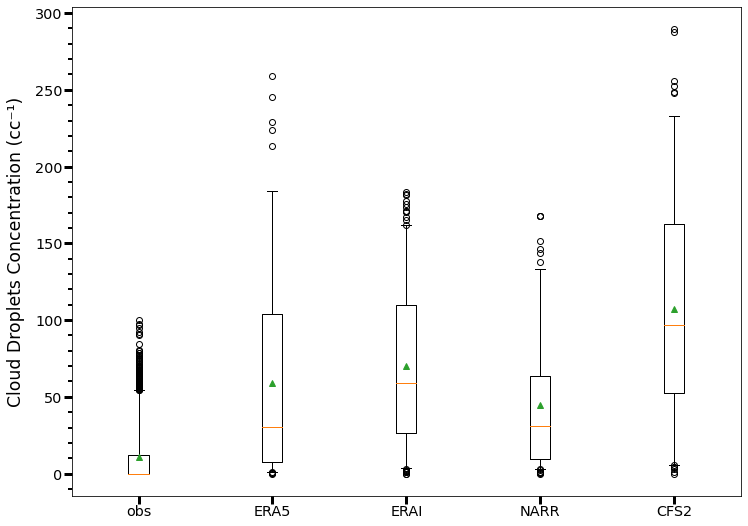

In [6]:
fig, ax = plt.subplots(figsize=(12,9))

## CDP Total Concentration -- rebinned units: cm-3
cdpconc_NRB_boxplot = ax.boxplot(x=[f_cdpconc_NRB_list[:-2].flatten()], positions=[0], showmeans=True, whis = [5,95], labels = ['obs']) ## the boxplot

reanalysis_list = ['ERA5', 'ERAI', 'NARR', 'CFS2']
for keys, num in zip(reanalysis_list, range(4)):
    qncloud_X_900m_flight_all = qncloud_X_900m_flight_all_dic[keys]
    qncloud_boxplot = ax.boxplot(x=np.unique(qncloud_X_900m_flight_all[:-2].flatten())/1000000, positions=[num+1], showmeans=True, whis = [5,95], labels = [keys]) ## the boxplot; whisker indicates 5%,95%
ax.set_ylabel("Cloud Droplets Concentration (cc⁻¹)", fontsize = 'xx-large', labelpad = 10)
ax.tick_params(which='major',labelsize='x-large', width=3, length=8,  pad=1)
ax.tick_params(which='minor',labelsize='small', width=2, length=4,  pad=1)
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())

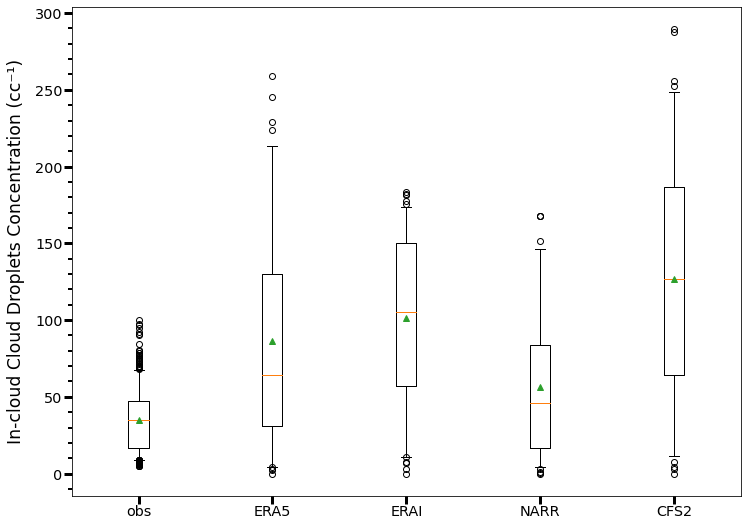

In [8]:
fig, ax = plt.subplots(figsize=(12,9))


## now let's distinguish the in/out cloud conditions
incloud_ind = np.where(f_cdpconc_NRB_list[:-2].flatten()>=5)
cdpconc_NRB_boxplot = ax.boxplot(x=[f_cdpconc_NRB_list[:-2].flatten()[incloud_ind]], positions=[0], showmeans=True, whis = [5,95], labels = ['obs']) ## the boxplot

reanalysis_list = ['ERA5', 'ERAI', 'NARR', 'CFS2']
for keys, num in zip(reanalysis_list, range(4)):
    qncloud_X_900m_flight_all = qncloud_X_900m_flight_all_dic[keys]
    qncloud_boxplot = ax.boxplot(x=np.unique(qncloud_X_900m_flight_all[:-2].flatten()[incloud_ind])/1000000, positions=[num+1], showmeans=True, whis = [5,95], labels = [keys]) ## the boxplot; whisker indicates 5%,95%
ax.set_ylabel("In-cloud Cloud Droplets Concentration (cc⁻¹)", fontsize = 'xx-large', labelpad = 10)
ax.tick_params(which='major',labelsize='x-large', width=3, length=8,  pad=1)
ax.tick_params(which='minor',labelsize='small', width=2, length=4,  pad=1)
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())

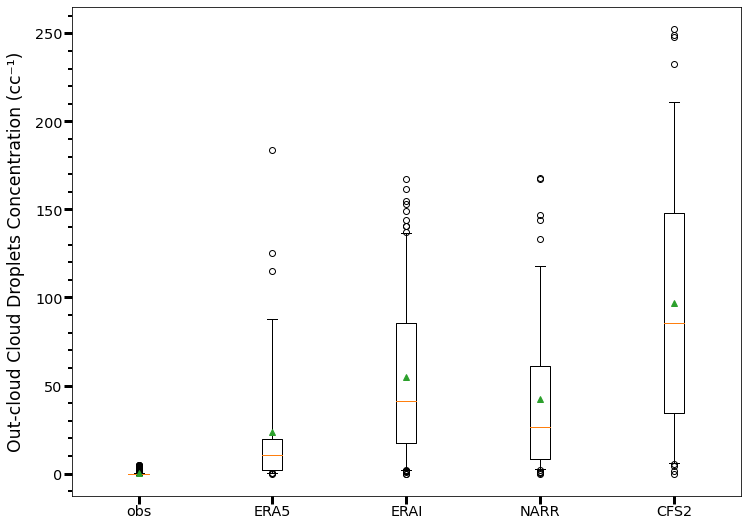

In [9]:
fig, ax = plt.subplots(figsize=(12,9))


## now let's distinguish the in/out cloud conditions
outcloud_ind = np.where(f_cdpconc_NRB_list[:-2].flatten()<5)
cdpconc_NRB_boxplot = ax.boxplot(x=[f_cdpconc_NRB_list[:-2].flatten()[outcloud_ind]], positions=[0], showmeans=True, whis = [5,95], labels = ['obs']) ## the boxplot

reanalysis_list = ['ERA5', 'ERAI', 'NARR', 'CFS2']
for keys, num in zip(reanalysis_list, range(4)):
    qncloud_X_900m_flight_all = qncloud_X_900m_flight_all_dic[keys]
    qncloud_boxplot = ax.boxplot(x=np.unique(qncloud_X_900m_flight_all[:-2].flatten()[outcloud_ind])/1000000, positions=[num+1], showmeans=True, whis = [5,95], labels = [keys]) ## the boxplot; whisker indicates 5%,95%
ax.set_ylabel("Out-cloud Cloud Droplets Concentration (cc⁻¹)", fontsize = 'xx-large', labelpad = 10)
ax.tick_params(which='major',labelsize='x-large', width=3, length=8,  pad=1)
ax.tick_params(which='minor',labelsize='small', width=2, length=4,  pad=1)
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())

## out-cloud conditions don't agree well between model and observation